In [12]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import exposure
from IPython.display import HTML

In [2]:
INPUT = 'input/'
OUTPUT = 'output/'
DOT_dictionary = {
    0: '#',
    1: '%',
    2: '*',
    3: '+',
    4: 'o',
    5: '|',
    6: ';',
    7: '^',
    8: '.',
    9: ' ',
}

In [19]:
def get_array(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell), round(width / cell)
    resized_image = cv2.resize(image, (shape_by_width * cell, shape_by_height * cell))
    brightness_array = np.empty(shape=(shape_by_height, shape_by_width))
    for i in range(shape_by_height):
        for j in range(shape_by_width):
            brightness_array[i][j] = np.mean(resized_image[i * cell:i * cell + cell, j * cell:j * cell + cell])
    return brightness_array


def get_array_easy_way(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell), round(width / cell)
    return cv2.resize(image, (shape_by_width, shape_by_height))
  
    
def equalize(array):
    return exposure.equalize_hist(array)


def normalize(array, new_min, new_max): 
    return new_min + (new_max - new_min) * (array - array.min()) / (array.max() - array.min()) 
    
    
def rounded(array):
    return array.round().astype('int')
    
        
def image_transform(filename, cell, shades):
    image = cv2.imread(INPUT + filename)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness_array = get_array(grayscale_image, cell)
    equalize_array = equalize(brightness_array)
    normalized_array = normalize(equalize_array, 0, shades - 1)
    rounded_array = rounded(normalized_array)
    return rounded_array 


def dot_transform(image, dot_dictionary):
    return '\n'.join([''.join([dot_dictionary[shade] for shade in row]) for row in image])

def to_html(text):
    return HTML(f'<pre style="font-family: monospace; line-height: 10px;">{text}</pre>')
        
def show_image(image):
    plt.figure(figsize=(40,40))
    plt.imshow(image, cmap='gray')

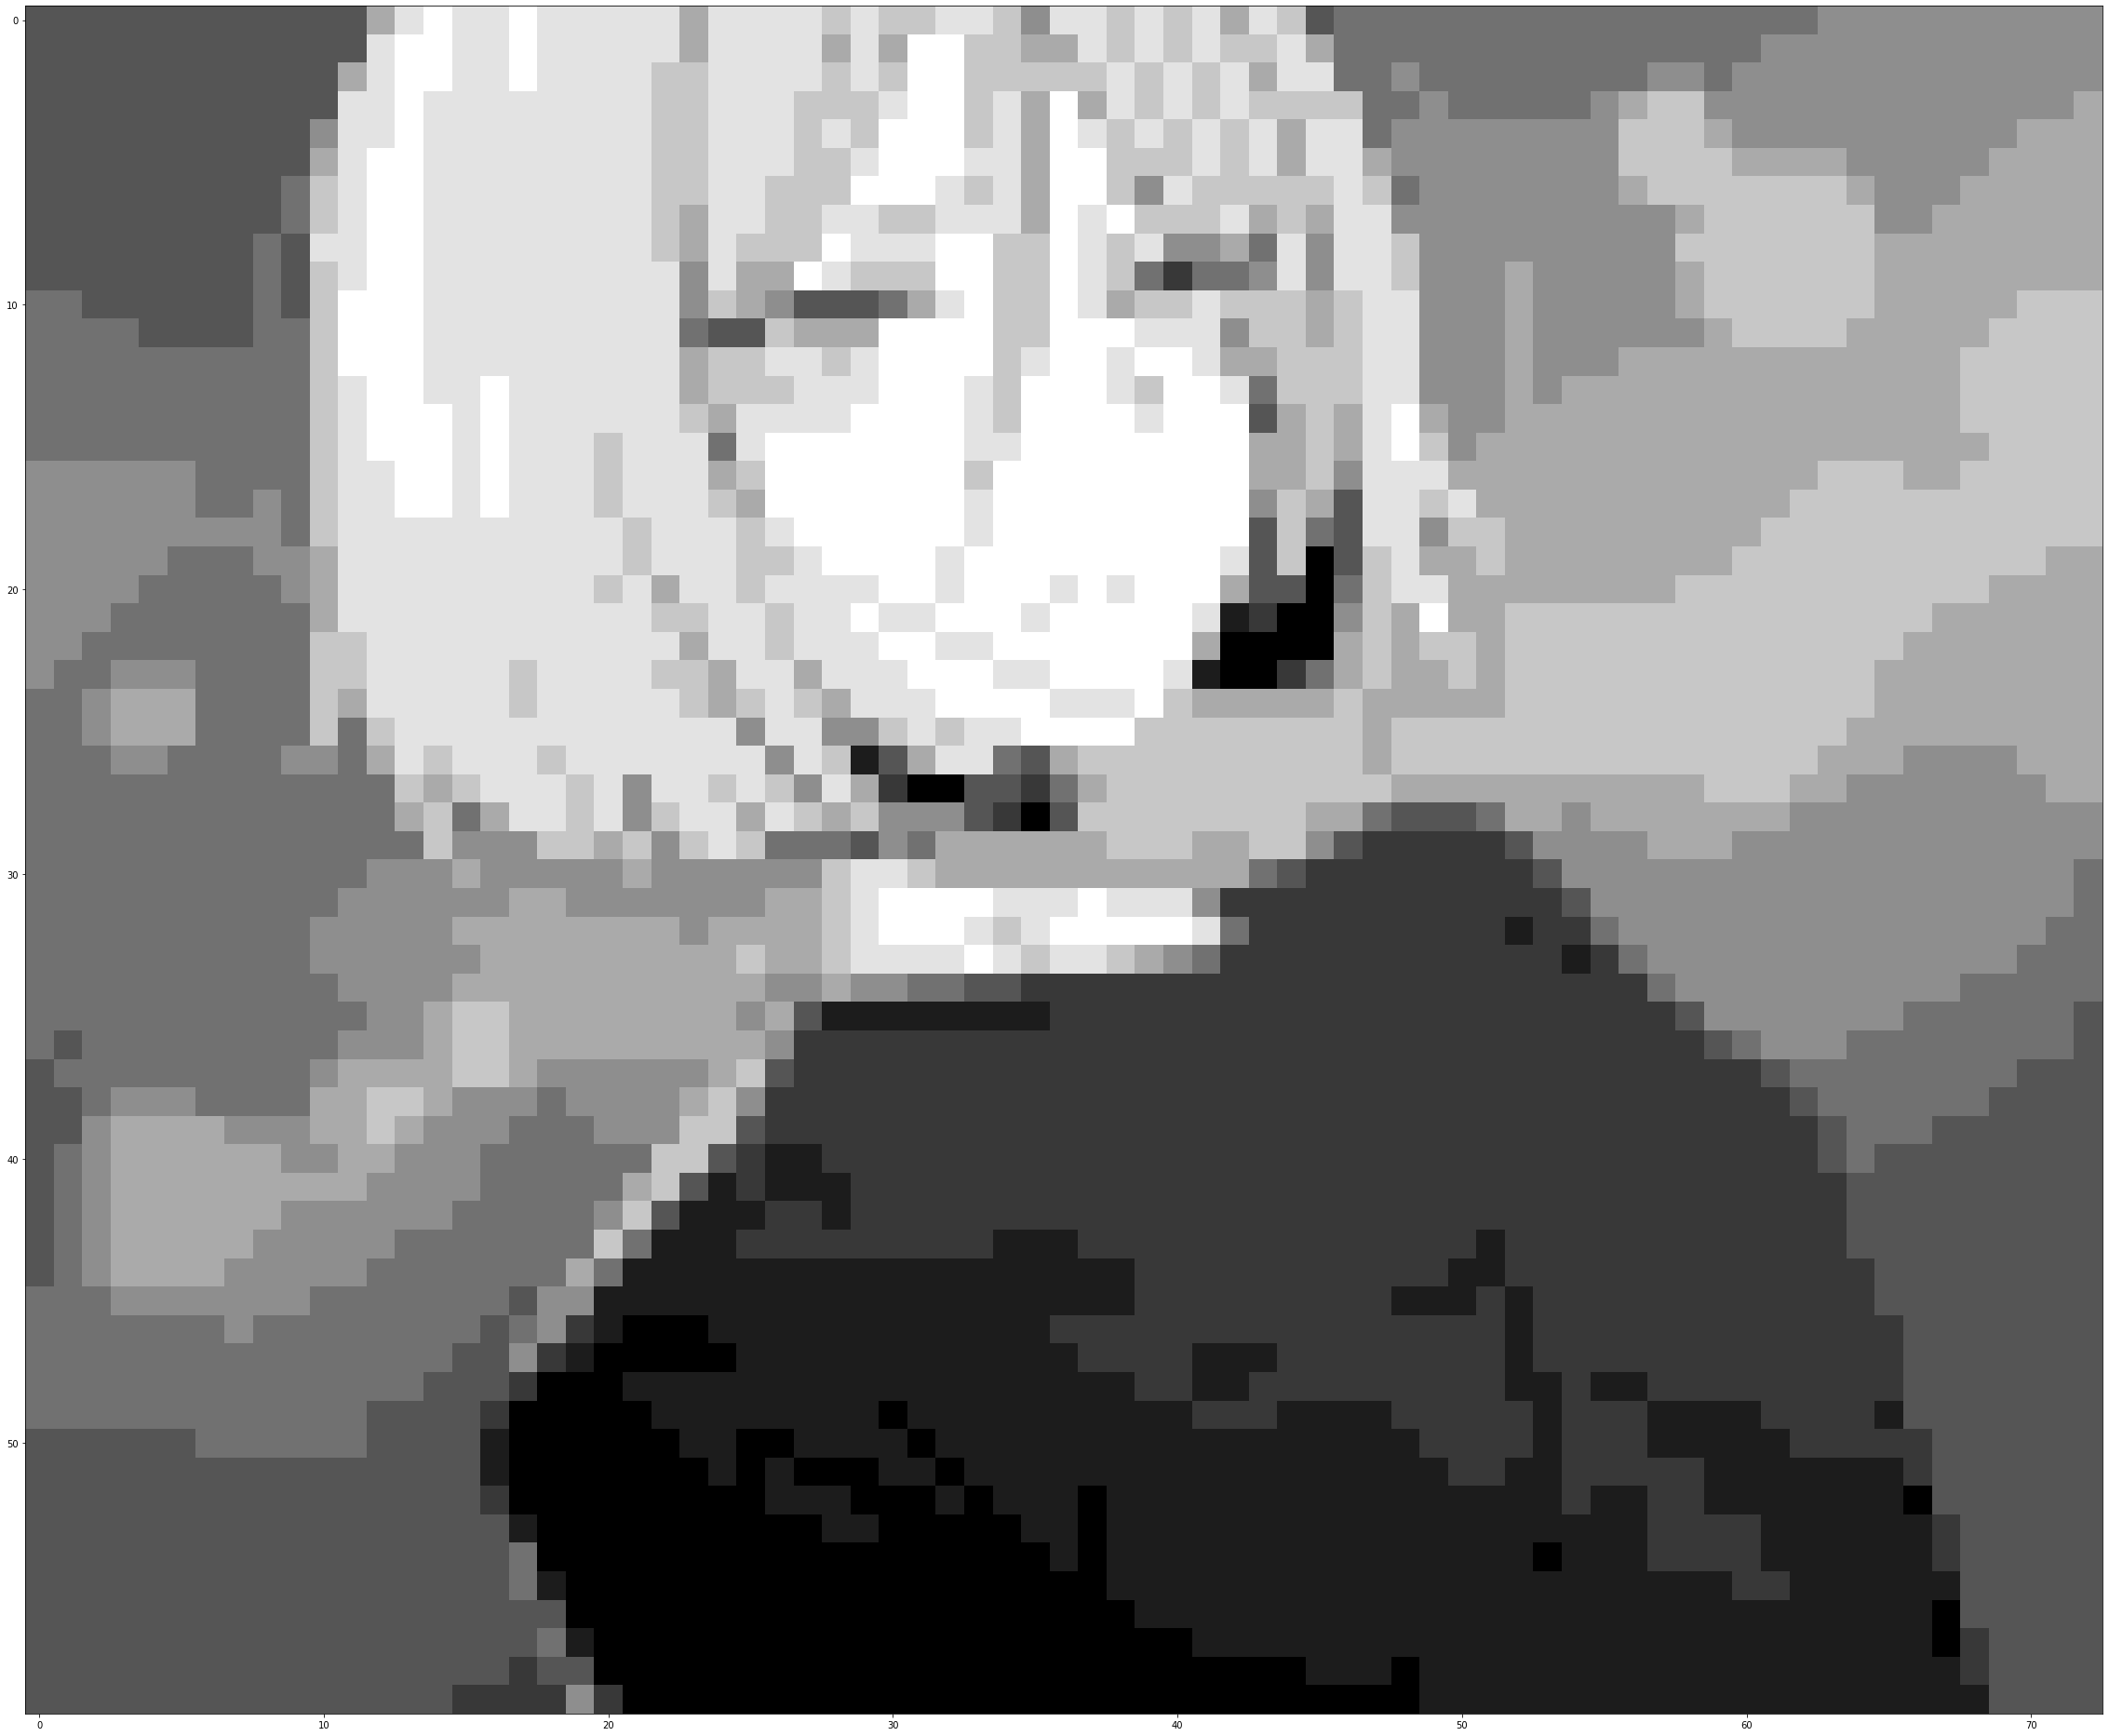

In [10]:
show_image(image_transform('anime.jpg', 7, 10))

In [25]:
dot_dictionary = {
    0: '#',
    1: '%',
    2: '*',
    3: '+',
    4: 'o',
    5: '|',
    6: ';',
    7: '^',
    8: '.',
    9: ' ',
}
to_html(dot_transform(image_transform('tyan.jpg', 16, 10), dot_dictionary))